In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import nilearn as nl
from nilearn import plotting, image
from nilearn import datasets
import nibabel as nb
import h5py
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [2]:
print('Datasets are stored in: %r' % datasets.get_data_dirs())

Datasets are stored in: ['C:\\Users\\dimam/nilearn_data']


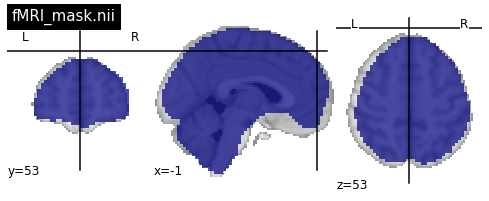

In [3]:
# Nifti MASK image
brain_mask = nb.load('00_Data/fMRI_mask.nii')
plotting.plot_roi(brain_mask, title='fMRI_mask.nii', cut_coords=[-1,53,53])

In [4]:
fnc_10 = next(pd.read_csv('00_Data/fnc.csv', low_memory=True, chunksize=5))
fnc_10.head()

,Id,SCN(53)_vs_SCN(69),SCN(98)_vs_SCN(69),SCN(99)_vs_SCN(69),SCN(45)_vs_SCN(69),ADN(21)_vs_SCN(69),ADN(56)_vs_SCN(69),SMN(3)_vs_SCN(69),SMN(9)_vs_SCN(69),SMN(2)_vs_SCN(69),...,CBN(13)_vs_DMN(94),CBN(18)_vs_DMN(94),CBN(4)_vs_DMN(94),CBN(7)_vs_DMN(94),CBN(18)_vs_CBN(13),CBN(4)_vs_CBN(13),CBN(7)_vs_CBN(13),CBN(4)_vs_CBN(18),CBN(7)_vs_CBN(18),CBN(7)_vs_CBN(4)
0,10001,0.368580,0.166876,0.438148,0.341007,-0.186251,0.049096,0.121417,-0.174268,-0.231578,...,-0.149279,0.552841,0.131046,0.335446,0.394867,-0.042853,0.124627,-0.060712,0.515964,0.290488
1,10002,0.151696,-0.024819,0.217504,0.418072,-0.227234,-0.064052,-0.143832,-0.118116,-0.054825,...,-0.214216,-0.039792,0.143014,-0.189962,0.498373,0.444231,0.592438,0.028649,0.705524,0.248327
2,10003,0.343415,0.109974,0.741641,0.578558,-0.676446,-0.436960,-0.295663,-0.377790,-0.344963,...,-0.154941,0.136850,-0.022361,0.137625,0.677972,0.409412,0.563892,0.438684,0.618204,0.284474
3,10004,0.132793,0.258255,0.490769,0.342717,0.091112,0.107969,0.029220,-0.026237,0.094742,...,-0.130339,0.309540,0.141469,0.030853,0.344394,0.214097,0.317556,0.012435,0.665937,0.081358
4,10005,0.291921,0.251254,0.416470,0.511719,-0.362626,-0.164710,-0.289059,-0.015537,-0.087316,...,-0.139525,0.394932,0.040443,0.428334,0.498837,0.266755,0.227379,0.028984,0.752343,0.087898


In [5]:
max_max = fnc_10.drop(columns='Id').max().max()

In [6]:
max_cols = fnc_10.drop(columns='Id').max()

In [7]:
max_max

0.9840016

In [8]:
fnc_10.drop(columns='Id').min().min()

-0.82533964

In [9]:
max_col = max_cols.loc[max_cols==max_max]
max_col

VSN(8)_vs_VSN(15)    0.984002
dtype: float64

In [10]:
fnc_10.loc[fnc_10['VSN(8)_vs_VSN(15)']==max_max]

,Id,SCN(53)_vs_SCN(69),SCN(98)_vs_SCN(69),SCN(99)_vs_SCN(69),SCN(45)_vs_SCN(69),ADN(21)_vs_SCN(69),ADN(56)_vs_SCN(69),SMN(3)_vs_SCN(69),SMN(9)_vs_SCN(69),SMN(2)_vs_SCN(69),...,CBN(13)_vs_DMN(94),CBN(18)_vs_DMN(94),CBN(4)_vs_DMN(94),CBN(7)_vs_DMN(94),CBN(18)_vs_CBN(13),CBN(4)_vs_CBN(13),CBN(7)_vs_CBN(13),CBN(4)_vs_CBN(18),CBN(7)_vs_CBN(18),CBN(7)_vs_CBN(4)
4,10005,0.291921,0.251254,0.41647,0.511719,-0.362626,-0.16471,-0.289059,-0.015537,-0.087316,...,-0.139525,0.394932,0.040443,0.428334,0.498837,0.266755,0.227379,0.028984,0.752343,0.087898


In [11]:
# fnc10_cols = fnc_10.columns.to_list()[1:]
# fnc10_cols_filtered = [i.split('_')[0] for i in fnc10_cols]
# len(np.unique(fnc10_cols_filtered))

In [12]:
fnc10_cols = fnc_10.columns.to_list()[1:]
fnc10_cols_filtered = []
for i in fnc10_cols:
    fnc10_cols_filtered.append(i.split('_')[0])
    fnc10_cols_filtered.append(i.split('_')[2])
print(np.unique(fnc10_cols_filtered), '\n')
print('Number of unique labels: ', len(np.unique(fnc10_cols_filtered)))

['ADN(21)' 'ADN(56)' 'CBN(13)' 'CBN(18)' 'CBN(4)' 'CBN(7)' 'CON(33)'
 'CON(37)' 'CON(38)' 'CON(43)' 'CON(48)' 'CON(55)' 'CON(61)' 'CON(63)'
 'CON(67)' 'CON(68)' 'CON(70)' 'CON(79)' 'CON(81)' 'CON(83)' 'CON(84)'
 'CON(88)' 'CON(96)' 'DMN(17)' 'DMN(23)' 'DMN(32)' 'DMN(40)' 'DMN(51)'
 'DMN(71)' 'DMN(94)' 'SCN(45)' 'SCN(53)' 'SCN(69)' 'SCN(98)' 'SCN(99)'
 'SMN(11)' 'SMN(2)' 'SMN(27)' 'SMN(3)' 'SMN(54)' 'SMN(66)' 'SMN(72)'
 'SMN(80)' 'SMN(9)' 'VSN(12)' 'VSN(15)' 'VSN(16)' 'VSN(20)' 'VSN(5)'
 'VSN(62)' 'VSN(77)' 'VSN(8)' 'VSN(93)'] 

Number of unique labels:  53


In [13]:
# Let's extract the indices for the different networks
# Network index:
ntwk_idx = {}
network_names = np.unique([i[:3] for i in fnc10_cols_filtered])
for ii in network_names:
    ntwk_idx[ii] = np.unique([np.int(i.split('(')[-1].split(')')[0]) for i in fnc10_cols_filtered if ii in i])
    
# Look up matrix index
icn_number = pd.read_csv('00_Data/ICN_numbers.csv')

icn_idx = {}

for jj in ntwk_idx.keys():
    icn_idx[jj] = np.array(icn_number.index[icn_number['ICN_number'].isin(ntwk_idx[jj])])

In [14]:
network_names

array(['ADN', 'CBN', 'CON', 'DMN', 'SCN', 'SMN', 'VSN'], dtype='<U3')

In [15]:
ntwk_idx

{'ADN': array([21, 56]),
 'CBN': array([ 4,  7, 13, 18]),
 'CON': array([33, 37, 38, 43, 48, 55, 61, 63, 67, 68, 70, 79, 81, 83, 84, 88, 96]),
 'DMN': array([17, 23, 32, 40, 51, 71, 94]),
 'SCN': array([45, 53, 69, 98, 99]),
 'SMN': array([ 2,  3,  9, 11, 27, 54, 66, 72, 80]),
 'VSN': array([ 5,  8, 12, 15, 16, 20, 62, 77, 93])}

In [16]:
icn_idx

{'ADN': array([5, 6], dtype=int64),
 'CBN': array([49, 50, 51, 52], dtype=int64),
 'CON': array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41],
       dtype=int64),
 'DMN': array([42, 43, 44, 45, 46, 47, 48], dtype=int64),
 'SCN': array([0, 1, 2, 3, 4], dtype=int64),
 'SMN': array([ 7,  8,  9, 10, 11, 12, 13, 14, 15], dtype=int64),
 'VSN': array([16, 17, 18, 19, 20, 21, 22, 23, 24], dtype=int64)}

In [3]:
# We load the data using h5py
test_mat1 = h5py.File('00_Data/fMRI_train/10001.mat', mode='r')
print(test_mat1.keys())
print(type(test_mat1.get('SM_feature')))
test_mat1 = np.array(test_mat1.get('SM_feature'))
test_mat2 = h5py.File('00_Data/fMRI_train/10005.mat', mode='r')
test_mat2 = np.array(test_mat2.get('SM_feature'))

print('Dimensions of ICA feature map 1')
print(test_mat1.shape)
print('Dimensions of ICA feature map 2')
print(test_mat2.shape)
print('Dimenions of the brain mask')
print(brain_mask.shape)




<KeysViewHDF5 ['SM_feature']>
<class 'h5py._hl.dataset.Dataset'>
Dimensions of ICA feature map 1
(53, 52, 63, 53)
Dimensions of ICA feature map 2
(53, 52, 63, 53)
Dimenions of the brain mask


NameError: name 'brain_mask' is not defined

In [18]:
# # Somehow nilearn is not happy with plotting matrices anymore - so we have to create a nifti first:
# def map_for_plotting(mat, brain_mask):
#     # Assuming that we provide a 3D image
#     # image.new_img_like creates a nifti by applying informaiton from the soure image (here brain_mask),
#     # like the affine to a matrix.
#     return image.new_img_like(brain_mask, mat.transpose([2, 1, 0]))

In [28]:
test_mat1[5, :, :, 0].shape

(52, 63)

In [35]:
test_mat1[5, :, 20, 34]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.08168392,
       -0.02138994, -0.51324522, -0.58326346,  0.11177996,  1.0667491 ,
        1.58554983,  1.67757988,  0.81607902, -0.14148973, -0.10368199,
        0.39495936,  0.14158444, -0.20041043, -0.47380859, -0.34378994,
        0.01740483,  0.02816345, -0.31467819, -0.95942914, -1.27459323,
       -0.40681398,  0.11010943,  0.28462136,  0.17370965,  0.30376595,
        0.04655805,  0.19936299,  0.05328913, -0.05681352, -0.31835157,
        0.43567401,  0.48669332,  0.04267297,  0.20999329,  0.40749261,
        0.41813406,  0.30045637,  0.33714983,  0.08378593,  0.18781509,
        0.35031268,  0.39263836,  0.28257659,  0.        ,  0.        ,
        0.        ,  0.        ])

In [62]:
test_mat1[1][2].shape

(63, 53)

In [63]:
test_mat1[icn_idx['ADN'] -1][1].shape

(52, 63, 53)

In [32]:
def load_individual_maps(patient_id, icn_idx, ntwk_idx, brain_mask):
    
    # Somehow nilearn is not happy with plotting matrices anymore - so we have to create a nifti first:
    def map_for_plotting(mat, brain_mask):
        # Assuming that we provide a 3D image
        # image.new_img_like creates a nifti by applying informaiton from the soure image (here brain_mask),
        # like the affine to a matrix.
        return image.new_img_like(brain_mask, mat.transpose([2, 1, 0]))

    patient_SM = h5py.File('00_Data/fMRI_train/{0}.mat'.format(patient_id), mode='r')
    patient_SM = np.array(patient_SM.get('SM_feature'))
    
    patient_maps = {}
    for i in icn_idx.keys():
        component_maps = {}
        for j, _ in enumerate(icn_idx[i]):
            jj = ntwk_idx[i][j]
            component_maps[jj] = map_for_plotting(patient_SM[icn_idx[i]][j], brain_mask)
        patient_maps[i] = component_maps
    return patient_maps

In [84]:
# # Let's extract the indices for the different average networks
# sample_maps1 = {}
# sample_maps2 = {}
# for ii in icn_idx.keys():
#     # indices -1 because matlab
#     sample_maps1[ii] = map_for_plotting(test_mat1[icn_idx[ii]].mean(0), brain_mask)
#     sample_maps2[ii] = map_for_plotting(test_mat2[icn_idx[ii]].mean(0), brain_mask)

In [90]:
sample_maps = load_individual_maps('10001', icn_idx, ntwk_idx, brain_mask)

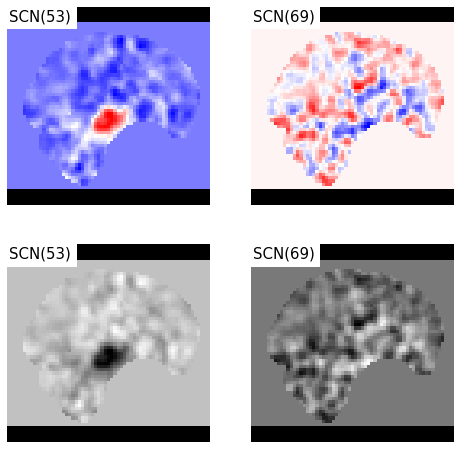

In [121]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

plotting.plot_epi(sample_maps['SCN'][53], title='SCN({0})'.format(53), axes=axes[0,0], annotate=False, display_mode='x', cut_coords=[0], cmap='bwr')
plotting.plot_epi(sample_maps['SCN'][53], title='SCN({0})'.format(53), axes=axes[1,0], annotate=False, display_mode='x', cut_coords=[0], cmap='binary')
plotting.plot_epi(sample_maps['SCN'][69], title='SCN({0})'.format(69), axes=axes[0,1], annotate=False, display_mode='x', cut_coords=[0], cmap='bwr')
plotting.plot_epi(sample_maps['SCN'][69], title='SCN({0})'.format(69), axes=axes[1,1], annotate=False, display_mode='x', cut_coords=[0], cmap='binary')
# axes[0].set_title('Networks for Participant 1');

In [33]:
sample_maps = load_individual_maps('10005', icn_idx, ntwk_idx, brain_mask)

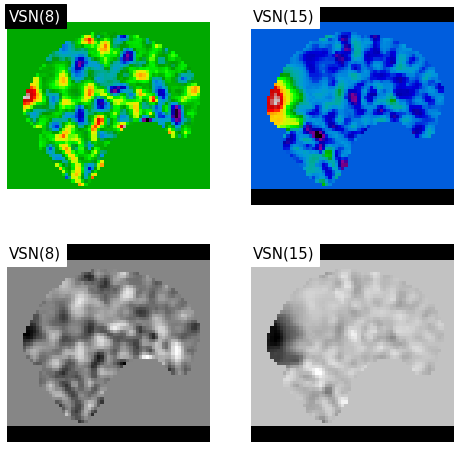

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

plotting.plot_epi(sample_maps['VSN'][8], title='VSN({0})'.format(8), axes=axes[0,0], annotate=False, display_mode='x', cut_coords=[0], black_bg=False)
plotting.plot_epi(sample_maps['VSN'][8], title='VSN({0})'.format(8), axes=axes[1,0], annotate=False, display_mode='x', cut_coords=[0], cmap='binary')
plotting.plot_epi(sample_maps['VSN'][15], title='VSN({0})'.format(15), axes=axes[0,1], annotate=False, display_mode='x', cut_coords=[0])
plotting.plot_epi(sample_maps['VSN'][15], title='VSN({0})'.format(15), axes=axes[1,1], annotate=False, display_mode='x', cut_coords=[0], cmap='binary')
# axes[0].set_title('Networks for Participant 1');

In [18]:
def load_individual_maps_img(patient_id, icn_idx, ntwk_idx):
    patient_SM = h5py.File('00_Data/fMRI_train/{0}.mat'.format(patient_id), mode='r')
    patient_SM = np.array(patient_SM.get('SM_feature'))
    
    patient_maps = {}
    for i in icn_idx.keys():
        component_maps = {}
        for j, _ in enumerate(icn_idx[i]):
            jj = ntwk_idx[i][j]
            component_maps[jj] = patient_SM[icn_idx[i]][j].transpose([2, 1, 0])
        patient_maps[i] = component_maps
    return patient_maps

In [19]:
sample_maps_img = load_individual_maps_img('10005', icn_idx, ntwk_idx)

In [20]:
sample_maps_img['VSN'][8].shape

(53, 63, 52)

In [21]:
img = sample_maps_img['VSN'][8]

In [26]:
img[:,:,:].shape

(53, 63, 52)

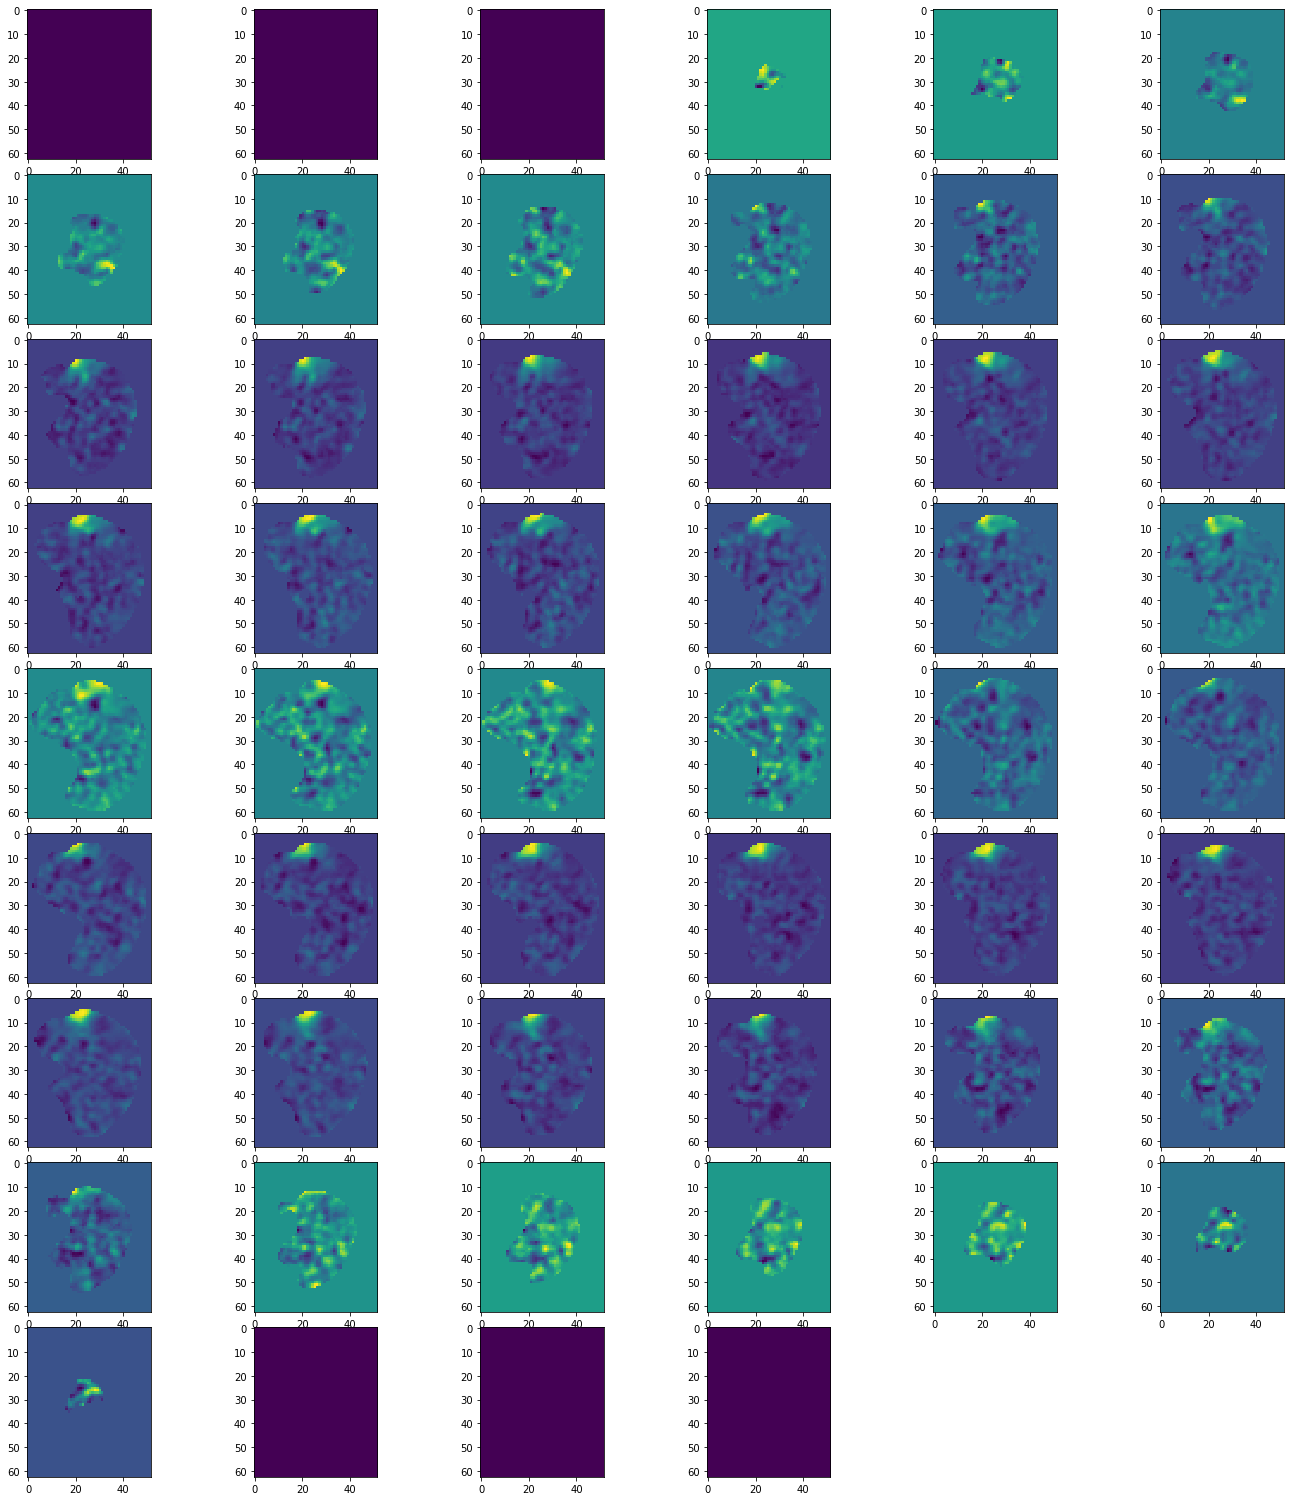

In [23]:
img = sample_maps_img['VSN'][8]

grd_n = img.shape[0]
grd_cols_n = 6
grd_rows_n = int(math.ceil(grd_n / grd_cols_n))

plt_h = 3
plt_w = 4

fig = plt.figure()
fig.set_size_inches(plt_w * grd_cols_n, plt_h * grd_rows_n)
gs = gridspec.GridSpec(grd_rows_n, grd_cols_n, figure=fig, wspace=0.1, hspace=0.1)

for i in range(grd_n-1):
    fig.add_subplot(gs[i])
    plt.imshow(img[i,:,:])

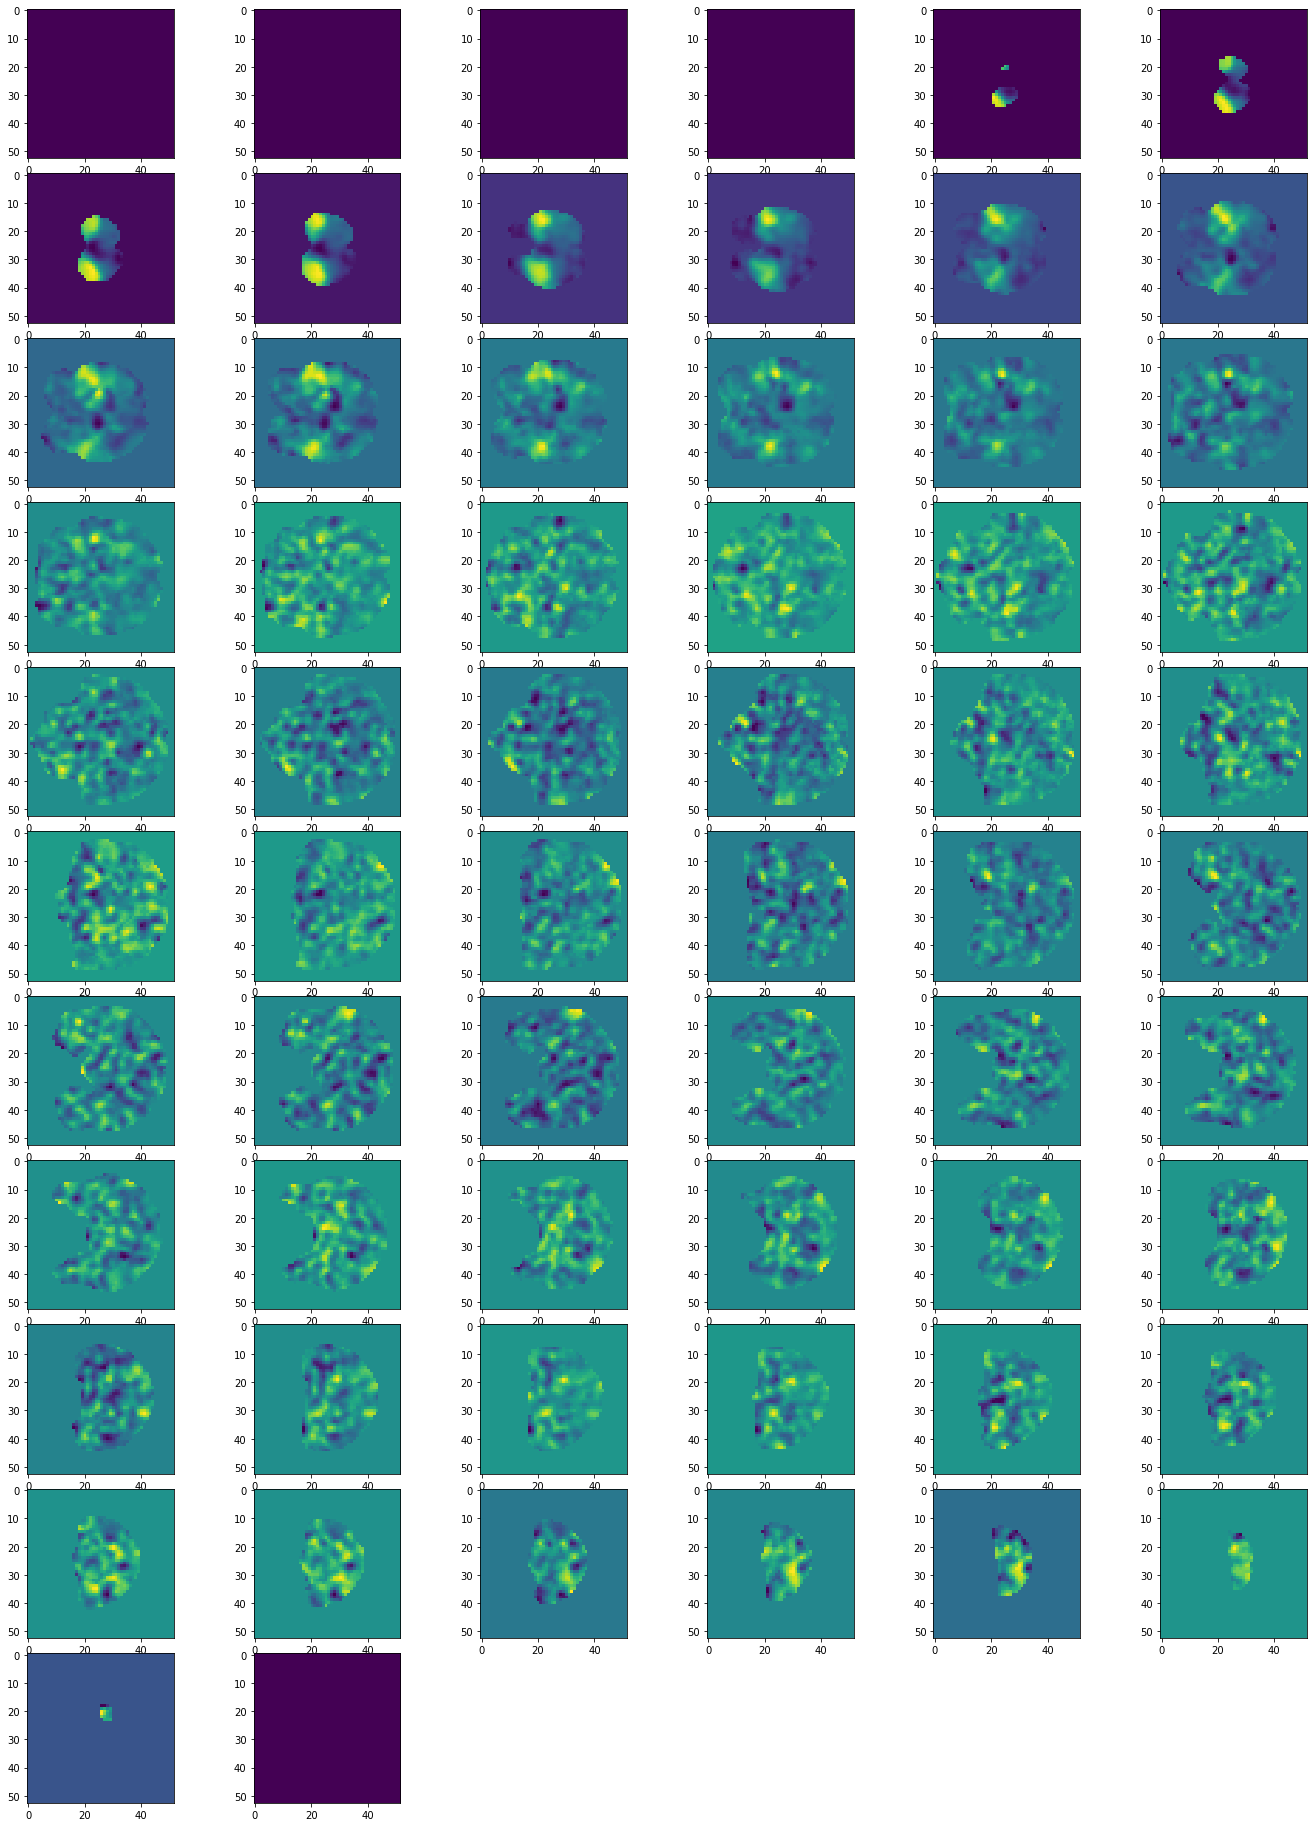

In [27]:
img = sample_maps_img['VSN'][8]

grd_n = img.shape[1]
grd_cols_n = 6
grd_rows_n = int(math.ceil(grd_n / grd_cols_n))

plt_h = 3
plt_w = 4

fig = plt.figure()
fig.set_size_inches(plt_w * grd_cols_n, plt_h * grd_rows_n)
gs = gridspec.GridSpec(grd_rows_n, grd_cols_n, figure=fig, wspace=0.1, hspace=0.1)

for i in range(grd_n-1):
    fig.add_subplot(gs[i])
    plt.imshow(img[:,i,:])

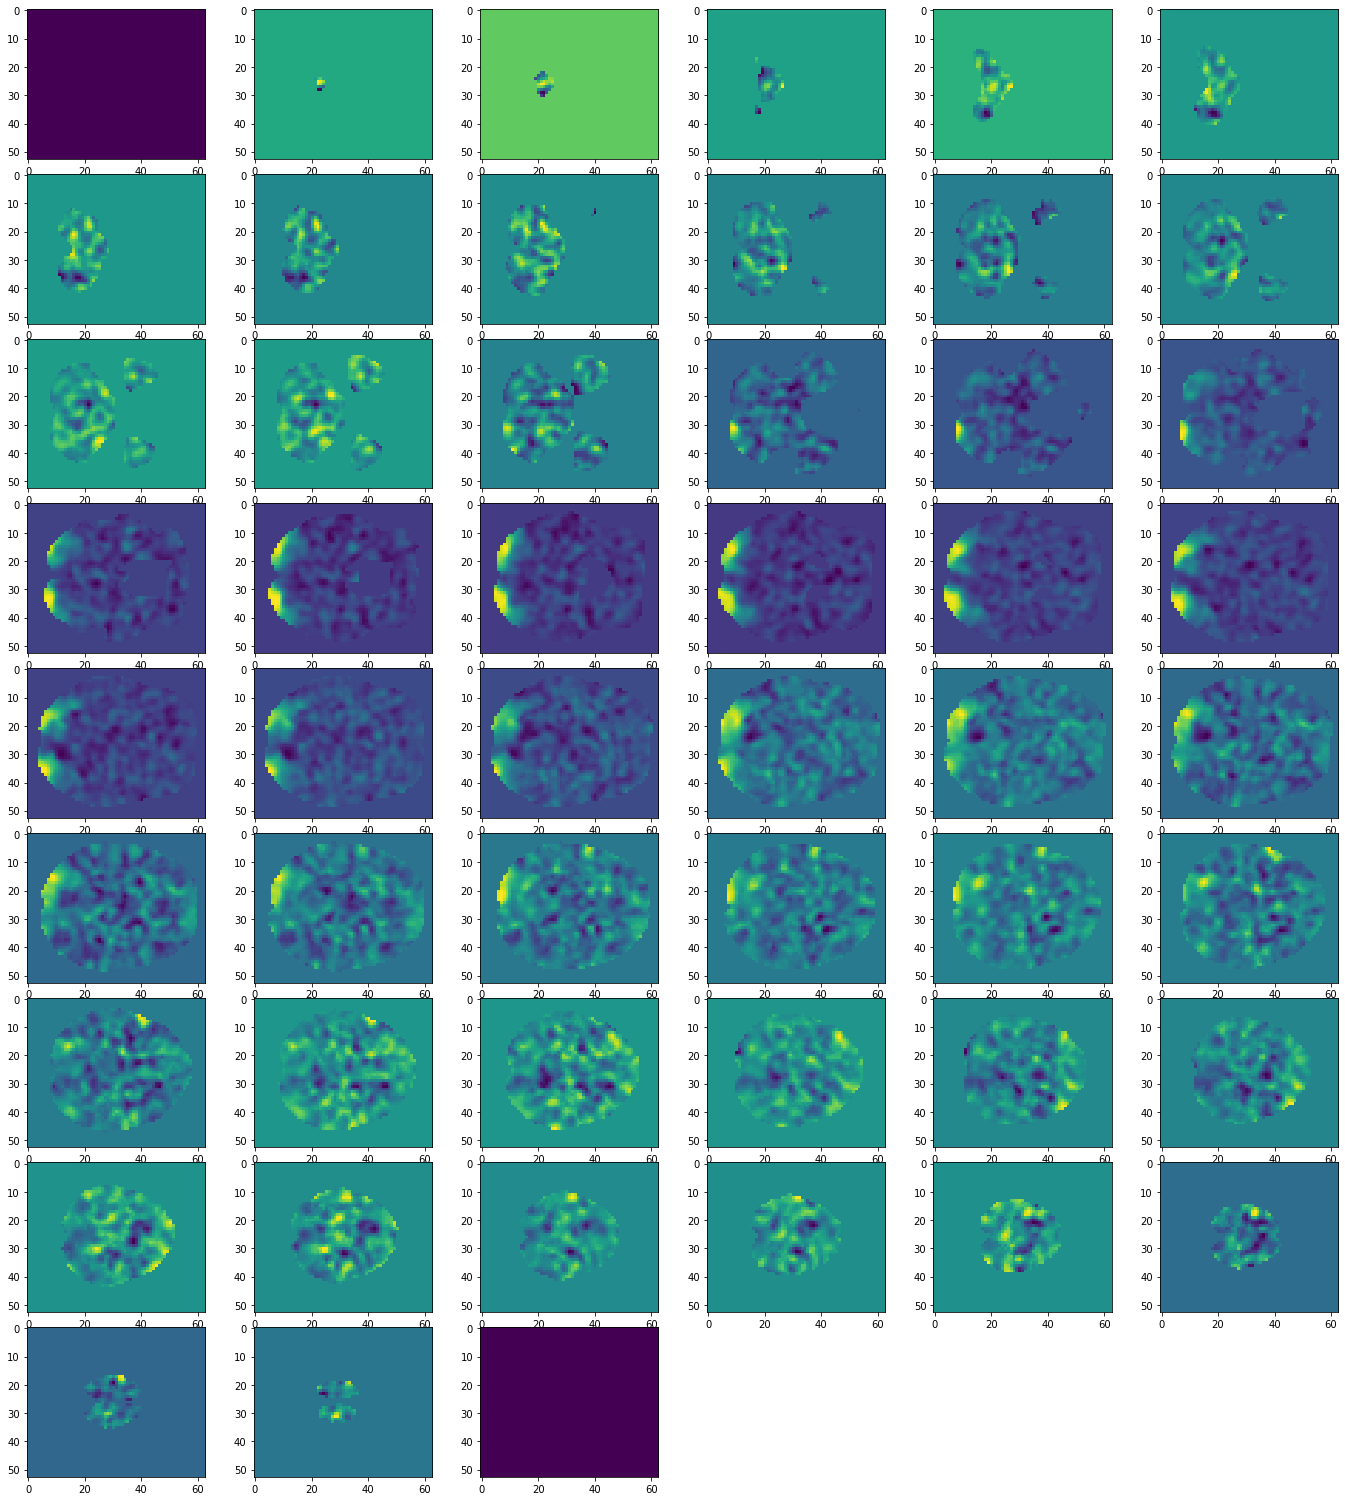

In [28]:
img = sample_maps_img['VSN'][8]

grd_n = img.shape[2]
grd_cols_n = 6
grd_rows_n = int(math.ceil(grd_n / grd_cols_n))

plt_h = 3
plt_w = 4

fig = plt.figure()
fig.set_size_inches(plt_w * grd_cols_n, plt_h * grd_rows_n)
gs = gridspec.GridSpec(grd_rows_n, grd_cols_n, figure=fig, wspace=0.1, hspace=0.1)

for i in range(grd_n-1):
    fig.add_subplot(gs[i])
    plt.imshow(img[:,:,i])